Extracting input/fashion/train-images-idx3-ubyte.gz
Extracting input/fashion/train-labels-idx1-ubyte.gz
Extracting input/fashion/t10k-images-idx3-ubyte.gz
Extracting input/fashion/t10k-labels-idx1-ubyte.gz
9999                                                                 

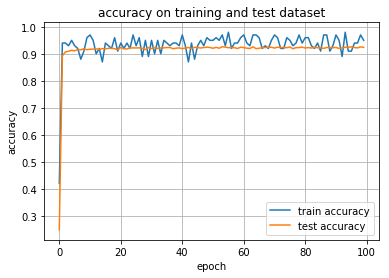

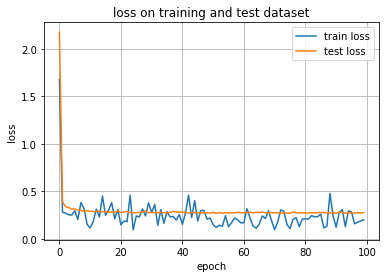

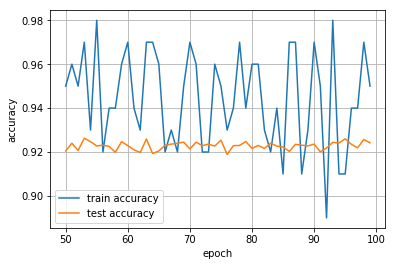

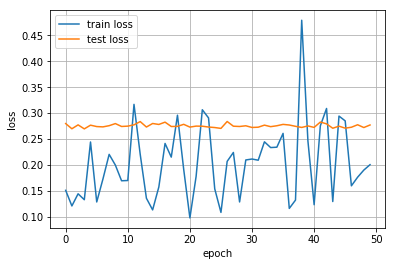

 Final test accuracy 0.9242
Final test loss 0.277096


In [8]:
# all tensorflow api is accessible through this
import tensorflow as tf        
# to visualize the resutls
import matplotlib.pyplot as plt 
# 70k mnist dataset that comes with the tensorflow container
from tensorflow.examples.tutorials.mnist import input_data


IMAGE_SIZE = 28
NUM_CHANNELS = 1

tf.set_random_seed(0)

# load data
mnist = input_data.read_data_sets('input/fashion', one_hot=True)
#mnist = input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/', one_hot=True)

# 1. Define Variables and Placeholders
X = tf.placeholder(tf.float32, [None, IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
Y_ = tf.placeholder(tf.float32, [None, 10])

# 2. Define the model
XX = tf.reshape(X, [-1, 784])
Y = tf.nn.softmax(tf.matmul(XX, W) + b)

# 3. Define the loss function  
cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y_ * tf.log(Y), reduction_indices = [1]))

# 4. Define the accuracy 
is_correct = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# 5. Define an optimizer
optimizer = tf.train.GradientDescentOptimizer(0.5)
#optimizer = tf.train.AdamOptimizer(0.005)
train_step = optimizer.minimize(cross_entropy)


# initialize
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


def training_step(i, update_test_data, update_train_data):

    print "\r", i,
    ####### actual learning 
    # reading batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)
    # the backpropagation training step
    sess.run(train_step, feed_dict={XX: batch_X, Y_: batch_Y})
    
    ####### evaluating model performance for printing purposes
    # evaluation used to later visualize how well you did at a particular time in the training
    train_a = []
    train_c = []
    test_a = []
    test_c = []
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: batch_X, Y_: batch_Y})
        train_a.append(a)
        train_c.append(c)

    if update_test_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: mnist.test.images, Y_: mnist.test.labels})
        test_a.append(a)
        test_c.append(c)

    
    return (train_a, train_c, test_a, test_c)


# 6. Train and test the model, store the accuracy and loss per iteration

train_a = []
train_c = []
test_a = []
test_c = []
    
training_iter = 10000
epoch_size = 100
for i in range(training_iter):
    test = False
    if i % epoch_size == 0:
        test = True
    a, c, ta, tc = training_step(i, test, test)
    train_a += a
    train_c += c
    test_a += ta
    test_c += tc
    
# 7. Plot and visualise the accuracy and loss

# accuracy training vs testing dataset
plt.title("accuracy on training and test dataset")
plt.plot(train_a, label = "train accuracy")
plt.plot(test_a, label = "test accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# loss training vs testing dataset
plt.title("loss on training and test dataset")
plt.plot(train_c, label = "train loss")
plt.plot(test_c, label = "test loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Zoom in on the tail of the plots
zoom_point = 50
x_range = range(zoom_point,training_iter/epoch_size)
plt.plot(x_range, train_a[zoom_point:], label = "train accuracy")
plt.plot(x_range, test_a[zoom_point:], label = "test accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

plt.plot(train_c[zoom_point:], label = "train loss")
plt.plot(test_c[zoom_point:], label = "test loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(loc="best")
plt.grid(True)
plt.show()

print('Final test accuracy ' + str(test_a[-1]))
print('Final test loss ' + str(test_c[-1]))

**Train with the GradientDescentOptimizer and a learning rate of 0.5**

Final test accuracy 0.9242

Final test loss 0.277096

**Train with the AdamOptimizer and a learning rate of 0.005**

Final test accuracy 0.098

Final test loss nan

Bias: the bias as a measure of how easy it is to get the perceptron to output a 1. with a really big bias, it's extremely easy for the perceptron to output a 1. But if the bias is very negative, then it's difficult for the perceptron to output a 1. 

